In [1]:
# load and train the data
import kagglehub

# Download latest version
path = kagglehub.dataset_download("puneet6060/intel-image-classification")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/intel-image-classification


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPool2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from tensorflow.keras.applications import VGG16

from PIL import Image

import os
from glob import glob
import cv2
import tensorflow as tf
import keras

In [4]:
train_dir = '/kaggle/input/intel-image-classification/seg_train/seg_train'
test_dir = '/kaggle/input/intel-image-classification/seg_test/seg_test'

In [8]:
# assign class labels
class_names = ['buildings','forest','glacier','mountain','sea']
class_labels = {class_name:i for i, class_name in enumerate(class_names)}
print(class_labels)

number_classes = len(class_names)

IMAGE_SIZE = (150,150)

{'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4}


In [9]:
# Set up ImageDataGenerator (you can add augmentation if you want later)
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Train loader (NO STREET)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='categorical',
    subset='training',
    classes=class_names,  # <<<<<< SPECIFY only these classes
    shuffle=True
)

# Validation loader (NO STREET)
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    classes=class_names,  # <<<<<< SPECIFY only these classes
    shuffle=True
)

# Now, load the test set (no validation split needed here)
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    classes=class_names  # <<<<<< Also exclude 'street' in test set
)


Found 9324 images belonging to 5 classes.
Found 2328 images belonging to 5 classes.
Found 2499 images belonging to 5 classes.


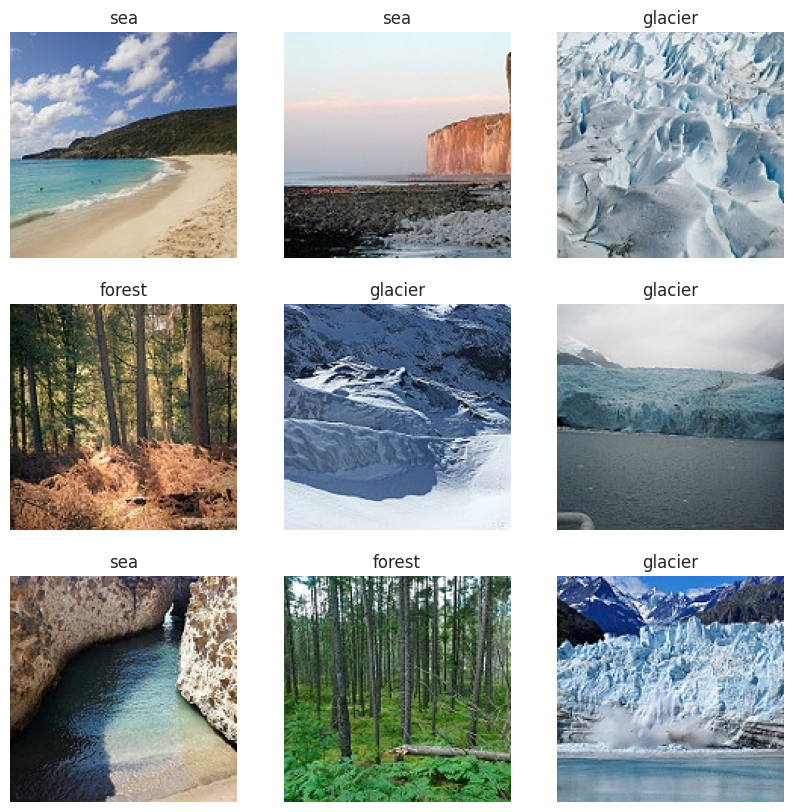

{'buildings': 0, 'forest': 1, 'glacier': 2, 'mountain': 3, 'sea': 4}


In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch
images, labels = next(train_generator)

# Plot 9 sample images
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(images[i])
    plt.title(class_names[np.argmax(labels[i])])
    plt.axis('off')
plt.show()

print(train_generator.class_indices)
